## Урок 7. Смежные технологии и дальнейшее развитие
 На выбор:
 1. Взять любой стерильный датасет, поработать с ним, применить машинное обучение, найти лучшую модель, интерпретировать результаты.
 2. Реализовать экспертную систему на Visual Prolog.
 3. Реализовать квантовые вычисления на Питоне, интерпретировать результаты.
 4. Применить технологию блокчейна для какой то задачи.


 ### Кубит — это вектор. 
 Вектор можно взять и покрутить по сфере вокруг. Чтобы покрутить, можно придумать матрицу, которая это вращение делает. Все операции над кубитами — это матрицы. Они называются унитарными.
 Унитарные — чтобы выполнялось такое условие, оно тут записано хитрым образом. Этот значок означает транспонированную и комплексно-сопряженную матричку. Свойство очень важное, оно означает, что для любой операции есть обратная. То есть как бы мы ни покрутили вектор, мы всегда можем его вернуть в прежнее положение. Всегда существует обратная операция.
 Посмотрим, какие операции могут быть. То, к чему мы привыкли в классическом случае. Есть нолик, можно превратить его в единичку и наоборот.

In [8]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

### NOT - Это оператор отрицания
*У оператора отрицания есть стандартная запись, оператор X. Если подумать, это просто вращение вокруг одной из осей. И есть операторы Y и Z, 
вращение вокруг других осей* 

Если мы запустим этот код, то получим, что с вероятностью единичка у нас там стоит нолик, потому что они инициализированы в таком состоянии и мы больше ничего с ними не делали

{'0': 1000}


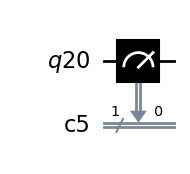

In [13]:
# симулятор имитирующий настоящее квантовое устройство
simulator = AerSimulator()
# Инициализируем 1 кубит 
q = QuantumRegister(1)
c = ClassicalRegister(1)
# связываем кубит с битом

condition = QuantumCircuit(q, c)
# Измерение
condition.measure(q, c)
# Компилируем схему
compiled_circuit = transpile(condition, simulator)
# Делаем 1000 замеров
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
condition.draw("mpl")


То же самое можно сделать с оператором отрицания. Это оператор X. 

{'1': 1000}


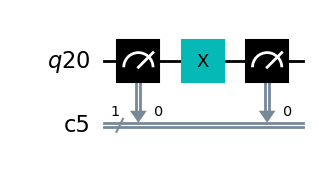

In [14]:
condition.x(0)
condition.measure(q, c)
compiled_circuit = transpile(condition, simulator)
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
condition.draw("mpl")

Теперь получили единичку 

### Оператор Адамара
    - Это состояние где мы получим такую суперпозицию,при которой, если мы попробуем ее измерить, то с вероятностью ½ получим или нолик, или единичку. То есть это будет такая равномерная суперпозиция, можем получить что угодно.


{'1': 526, '0': 474}


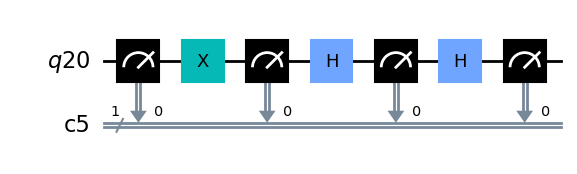

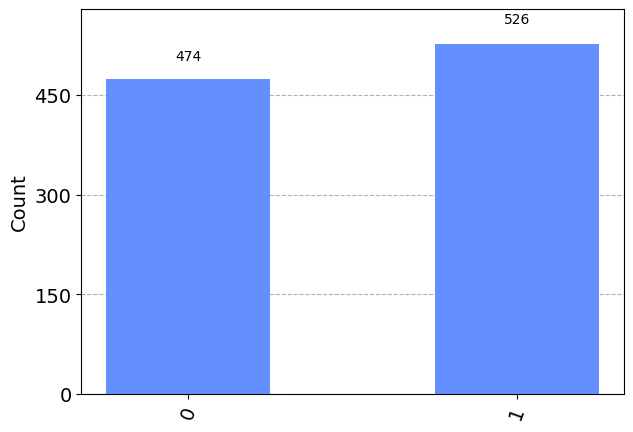

In [16]:
from qiskit.visualization import plot_histogram

condition.h(0)
condition.measure(q, c)
compiled_circuit = transpile(condition, simulator)
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
display(condition.draw("mpl"))
plot_histogram(res.get_counts(compiled_circuit))

Получили с вероятностью 50/50 нолик и единичку. 

In [ ]:
Оператор СNOT

{'00': 1000}


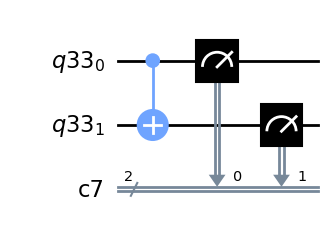

In [19]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
condition = QuantumCircuit(q, c)

condition.cx(q[0],q[1])
condition.measure(q, c)
compiled_circuit = transpile(condition, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
print(result.get_counts(condition))
condition.draw("mpl")

{'11': 484, '00': 516}


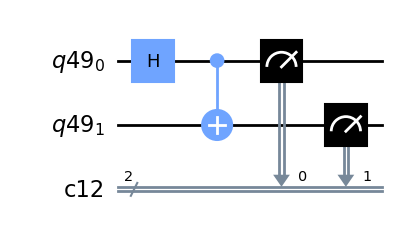

In [24]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
condition = QuantumCircuit(q, c)
condition.h(0)
condition.cx(0, 1)
condition.measure(q, c)
compiled_circuit = transpile(condition, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
print(result.get_counts(condition))
condition.draw("mpl")

### Это состояние называется запутанным 
 *Смотрите, если мы измеряем первый кубит и он у нас в состоянии ноль,  тогда можно сказать, что второй кубит обязательно в состоянии один.
 Это называется эффектом квантовой запутанности или квантовой связанности. И это основной механизм, с помощью которого квантовые вычисления работают. Он изменится, они связаны очень жестко, и во время измерения мы можем получить только |00⟩ или |11⟩*